In [11]:
import ipywidgets as widgets
from IPython.display import display, HTML

javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}


def toggle_code(state):

    """
    Toggles the JavaScript show()/hide() function on the div.input element.
    """

    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)

    display(HTML(output))


def button_action(value):

    """
    Calls the toggle_code function and updates the button description.
    """

    state = value.new

    toggle_code(state)

    value.owner.description = button_descriptions[state]


state = False
toggle_code(state)

button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")

display(button)

ToggleButton(value=False, description='Show code')

In [5]:
# Deze cell importeert een aantal functies en modules die je nodig hebt om deze opdracht te maken.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

import matplotlib.pyplot as plt
from collections import defaultdict


# Start notebook mode
init_notebook_mode(connected=True)

import pandas as pd # we gebruiken pandas om de CSV data te laden en te visualiseren

# dataframe with terrorism dataset
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding = 'ISO-8859-1', low_memory = False)
df.fillna(0, inplace = True)

eu = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus','Czechia', 'Denmark', 'Estiona',
     'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuani',
     'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 
     'Spain', 'Sweden', 'United Kingdom']

lijst = [item for item in df.index if df.loc[item]['iyear'] > 2015]
        
df = df.drop(lijst, axis = 0)

# In hoeverre neemt de terroristische dreiging toe in de Europese Unie?

De angst voor terroristische aanvallen onder Nederlanders lijkt te zijn gestegen, meldde het AD vorig jaar (2018). Het aantal mensen dat zich zorgen maakt is toegenomen met meer dan 10 procent. Hoe rechtvaardig is deze angst? In dit onderzoek wordt er gekeken naar de verandering van de terroristische dreiging tussen 1970 en 2015. De dreiging wordt hier gedefiniëerd als het aantal terroristische aanvallen. 

https://www.ad.nl/binnenland/meer-nederlanders-maken-zich-zorgen-om-een-terroristische-aanslag~a042b278/?referrer=https://www.google.com/

De gegevens zijn afkomstig uit de database The Global Terrorism Database (GTD). Dit is een open-source database en bevat zowel binnenlandse als internationale terroristische aanvallen tussen 1970 en 2017. De database bevat nu al meer dan 180,000 incidenten.  

In [18]:
"""
Line chart containing number of attacks on civilians in the EU, displayed by year
"""

attacks_citizens = dict()

for item in df.index: 
    # check if country is in EU
    if df.loc[item]['iyear'] <= 2015 and df.loc[item]['country_txt'] in eu:
        # check if target of attack is citizen
        if 'Citizens' in df.loc[item]['targtype1_txt']:
            # add attack to dictionary
            if df.loc[item]['iyear'] in attacks_citizens:
                attacks_citizens[df.loc[item]['iyear']] += 1
            else:
                attacks_citizens[df.loc[item]['iyear']] = 1
                
trace1 = go.Scatter(
    x = list(attacks_citizens.keys()),
    y = list(attacks_citizens.values()),
    mode = 'lines',
    name = 'Aantal aanvallen'
)

# maak informatie voor de afgeleide
old_y = 0
afgeleide = []
for amount in list(attacks_citizens.values()):
    rc = amount - old_y
    afgeleide.append(rc)
    old_y = amount

trace2 = go.Scatter(
    x = list(attacks_citizens.keys()),
    y = afgeleide,
    mode = 'lines',
    name = 'Stijging of daling aantal aanvallen'

)    
    
    
layout = go.Layout(
    xaxis=go.layout.XAxis(
        title = 'Jaar'
    ),
    yaxis = go.layout.YAxis(
        title = 'Aantal aanvallen'
    ),
    title = 'Aantal aanvallen op burgers in de EU per jaar'
)

data = [trace1, trace2]

citizens = go.Figure(data = data, layout = layout)

iplot(citizens)

Hierboven is te zien hoe de dreiging fluctueert over de tijdspanne van 1970 tot 2015. De hoeveelheid aanvallen is niet eerder zo hoog geweest als in 2015. Ook is de stijging van aanvallen sinds 1972 niet zo hoog geweest als in 2015. 

In [24]:
targets1 = dict()

for item in df.index:
    # add targettype to dict for the year 1970
    if df.loc[item]['country_txt'] in eu and df.loc[item]['iyear'] == 1970:
        if df.loc[item]['targtype1_txt'] in targets1:
            targets1[df.loc[item]['targtype1_txt']] += 1
        else:
            targets1[df.loc[item]['targtype1_txt']] = 1
                        
targets2 = dict()

for item in df.index:
    # add targettype to dict for the year 2015
    if df.loc[item]['country_txt'] in eu and df.loc[item]['iyear'] == 2015:
        if df.loc[item]['targtype1_txt'] in targets2:
            targets2[df.loc[item]['targtype1_txt']] += 1
        else:
            targets2[df.loc[item]['targtype1_txt']] = 1

# list of targettypes with less than 21 attacks
items = [x for x,y in targets2.items() if y <= 21 and x != 'Other']

# total number of attacks from items in list items
counter = sum([y for x,y in targets2.items() if y <= 21 and x != 'Other'])

# delete every item with less than 21 attacks
for item in items:
    del targets2[item]
    
# add counter to dict with name 'Other'
targets2['Other'] = counter


trace = go.Pie(
    values = list(targets1.values()),
    labels = list(targets1.keys()), 
    domain = {'column': 0},
    name = '1970',
    hole = 0.4
)    

trace2 = go.Pie(
    values = list(targets2.values()),
    labels = list(targets2.keys()),
    domain = {'column': 1},
    name = '2015',
    hole = 0.4
)

layout = go.Layout(
    title = 'Verschuiving van het doelwit van de aanvallen tussen 1970 en 2015, in de EU',
    grid = {'rows': 1, 'columns': 2},
    annotations = [
        {
            'font' : {'size': 20},
            'showarrow' : False,
            'text' : '1970',
            'x': 0.2,
            'y': 0.5 
        },
        {
            'font' : {'size': 20},
            'showarrow' : False,
            'text' : '2015',
            "x": 0.81,
            "y": 0.5
        }
    ]
)


targets = go.Figure(data = [trace, trace2], layout = layout)

iplot(targets)

In 1970 waren de meeste aanslagen gericht op zowel vliegtuigen/vliegvelden, de overheid als op burgers. Maar te in de visualisatie hierboven is te zien dat in 2015 deze verdeling is verschoven. In plaats van dat ongeveer een kwart van alle aanvallen binnen de EU gericht was op de burger, is 35 jaar later meer dan de helft van alle aanvallen gericht op de gewone burgers. Dat de huidige Nederlander angstiger is voor terroristische aanslagen lijkt hierdoor gegronder. 

# 3. Map

In [8]:
import geopandas as gpd
from descartes import PolygonPatch

# map bestand
gdf = gpd.read_file('./maps/ne_10m_admin_0_countries.shp')

# elke aanval per land per jaar
country_attacks = dict()

for item in df.index:
    if df.loc[item]['country_txt'] in country_attacks:
        country_attacks[df.loc[item]['country_txt']].append(df.loc[item]['iyear'])
    else:
        country_attacks[df.loc[item]['country_txt']] = [df.loc[item]['iyear']]

# aanvallen per land in gewenste jaren
year_country_attacks = {}

years = ['1970','1975','1980','1985','1990','1995','2000','2005','2008','2009','2010','2011','2012','2013',
         '2014','2015']  

for country in country_attacks:
    year_country_attacks[country] = defaultdict(lambda: 0)
    for year in country_attacks[country]:
        if str(year) in years:
            if year in year_country_attacks[country]:
                year_country_attacks[country][year] += 1
            else:
                year_country_attacks[country][year] = 1

# populatie per land per jaar in geselecteerde jaren (vervang naam Tsjechie om overeen te komen
# met de andere databases)
                
gdf['ADMIN'].replace('Czech Republic', 'Czechia')

# csv waarden populatie landen
df = pd.read_csv('./maps/API_SP.POP.TOTL_DS2_en_csv_v2_10576638.csv', skiprows=4)
df.rename(index=str, columns={'Country Name' : 'Country_Name'}, inplace=True)
colsX = ['Country_Name','1970','1975','1980','1985','1990','1995','2000','2005','2008','2009','2010','2011','2012','2013',
         '2014','2015']   
world_dfX = df[colsX]

cols = ['ADMIN', 'geometry']
world_map = gdf[cols]

# verwijder landen die geen aanslagen hadden in gemeten jaren

for country in year_country_attacks.copy():
    if year_country_attacks[country] == 0:
        del year_country_attacks[country]

for country in world_dfX['Country_Name']:
    if country not in year_country_attacks.keys():
        world_dfX.drop(world_dfX[world_dfX['Country_Name'] == country].index , inplace=True)
        world_map.drop(world_map[world_map['ADMIN'] == country].index , inplace=True)
        
# van populatie per jaar naar aanvallen/populatie in dat jaar

for country in world_dfX['Country_Name']:
    for year in years:
        if year_country_attacks[country][int(year)] != 0:
            div = year_country_attacks[country][int(year)]
            pop = world_dfX.loc[world_dfX.Country_Name == country, year].values[0]
            world_dfX.loc[world_dfX.Country_Name == country, year] = div / pop
        else:
            world_dfX.loc[world_dfX.Country_Name == country, year] = 0
            
# voeg alle data samen om in een map te kunnen tonen   
merged = world_map.set_index('ADMIN').join(world_dfX.set_index('Country_Name'))


ModuleNotFoundError: No module named 'geopandas'

NameError: name 'merged' is not defined

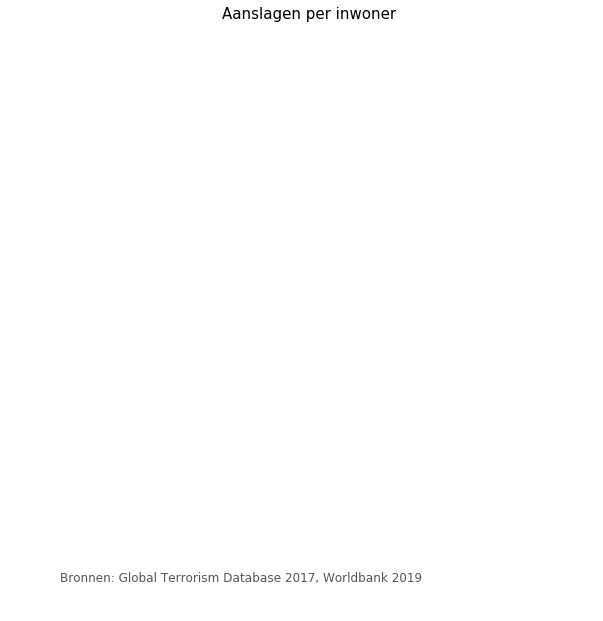

In [9]:
# zet de straal van de kleuren
vmin, vmax = 180, 220
# maak figuur en assen 
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Aanslagen per inwoner', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.annotate('Bronnen: Global Terrorism Database 2017, Worldbank 2019',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
merged.plot(column='1970', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8');


NameError: name 'merged' is not defined

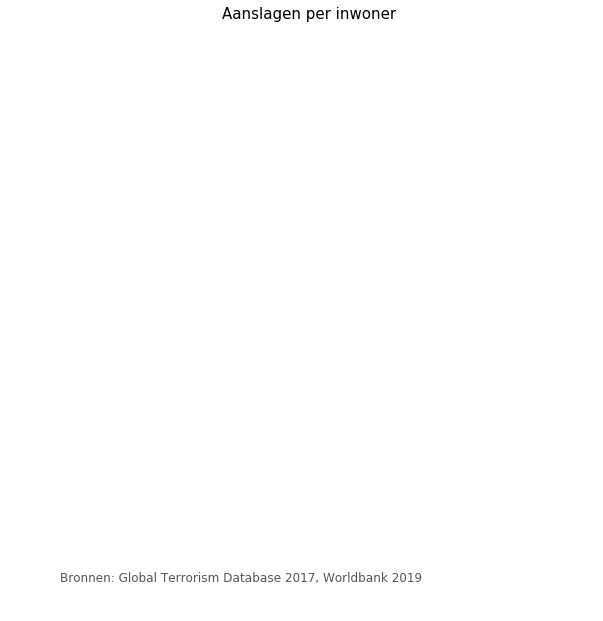

In [10]:
# zet de straal van de kleuren
vmin, vmax = 180, 220
# maak figuur en assen 
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Aanslagen per inwoner', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.annotate('Bronnen: Global Terrorism Database 2017, Worldbank 2019',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
merged.plot(column='1975', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8');


In [ ]:
# zet de straal van de kleuren
vmin, vmax = 180, 220
# maak figuur en assen 
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Aanslagen per inwoner', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.annotate('Bronnen: Global Terrorism Database 2017, Worldbank 2019',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
merged.plot(column='1980', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8');


In [ ]:
# zet de straal van de kleuren
vmin, vmax = 180, 220
# maak figuur en assen 
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Aanslagen per inwoner', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.annotate('Bronnen: Global Terrorism Database 2017, Worldbank 2019',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
merged.plot(column='1985', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8');


In [ ]:
# zet de straal van de kleuren
vmin, vmax = 180, 220
# maak figuur en assen 
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Aanslagen per inwoner', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.annotate('Bronnen: Global Terrorism Database 2017, Worldbank 2019',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
merged.plot(column='1990', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8');


In [ ]:
# zet de straal van de kleuren
vmin, vmax = 180, 220
# maak figuur en assen 
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Aanslagen per inwoner', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.annotate('Bronnen: Global Terrorism Database 2017, Worldbank 2019',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
merged.plot(column='1995', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8');


In [ ]:
# zet de straal van de kleuren
vmin, vmax = 180, 220
# maak figuur en assen 
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Aanslagen per inwoner', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.annotate('Bronnen: Global Terrorism Database 2017, Worldbank 2019',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
merged.plot(column='2000', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8');


In [ ]:
# zet de straal van de kleuren
vmin, vmax = 180, 220
# maak figuur en assen 
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Aanslagen per inwoner', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.annotate('Bronnen: Global Terrorism Database 2017, Worldbank 2019',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
merged.plot(column='2005', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8');


In [ ]:
# zet de straal van de kleuren
vmin, vmax = 180, 220
# maak figuur en assen 
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Aanslagen per inwoner', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.annotate('Bronnen: Global Terrorism Database 2017, Worldbank 2019',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
merged.plot(column='2008', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8');


In [ ]:
# zet de straal van de kleuren
vmin, vmax = 180, 220
# maak figuur en assen 
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Aanslagen per inwoner', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.annotate('Bronnen: Global Terrorism Database 2017, Worldbank 2019',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
merged.plot(column='2010', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8');


In [ ]:
# zet de straal van de kleuren
vmin, vmax = 180, 220
# maak figuur en assen 
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Aanslagen per inwoner', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.annotate('Bronnen: Global Terrorism Database 2017, Worldbank 2019',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
merged.plot(column='2012', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8');


In [ ]:
# zet de straal van de kleuren
vmin, vmax = 180, 220
# maak figuur en assen 
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Aanslagen per inwoner', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.annotate('Bronnen: Global Terrorism Database 2017, Worldbank 2019',xy=(0.1, .08),  xycoords='figure fraction', 
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
merged.plot(column='2015', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8');

In [21]:
suicide = dict()

# count number of suicide attacks per year in EU
for item in df.index:
    if df.loc[item]['country_txt'] in eu and df.loc[item]['suicide'] == 1:
        if df.loc[item]['iyear'] in suicide:
            suicide[df.loc[item]['iyear']] += 1
        else:
            suicide[df.loc[item]['iyear']] = 1

trace = go.Scatter(
    x = list(suicide.keys()),
    y = list(suicide.values()),
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(217, 30, 24, 1)',
        line = dict(
            width = 2,
        )
    )
)

layout = go.Layout(
    xaxis=go.layout.XAxis(
        title = 'Jaar'
    ),
    yaxis = go.layout.YAxis(
        title = 'Aantal aanvallen'
    ),
    title = 'Aantal zelfmoordaanslagen per jaar binnen de EU',
)

plot = go.Figure(data = [trace], layout = layout)

iplot(plot)

In [23]:
first = dict()

for item in df.index:
    # count number of attacks where nationality of target is european in 1970
    if df.loc[item]['natlty1_txt'] in eu and df.loc[item]['iyear'] == 1970:
        if df.loc[item]['natlty1_txt'] in first:
            first[df.loc[item]['natlty1_txt']] += 1
        else:
            first[df.loc[item]['natlty1_txt']] = 1
            
second = dict()

for item in df.index:
    # count number of attacks where nationality of target is european in 2015
    if df.loc[item]['natlty1_txt'] in eu and df.loc[item]['iyear'] == 2015:
        if df.loc[item]['natlty1_txt'] in second:
            second[df.loc[item]['natlty1_txt']] += 1
        else:
            second[df.loc[item]['natlty1_txt']] = 1
            

trace_1970 = go.Bar(
    x = list(first.keys()),
    y = list(first.values()),
    name = '1970',

)

trace_2015 = go.Bar(
    x = list(second.keys()),
    y = list(second.values()),
    name = '2015',
    marker=dict(
        color='rgb(255,127,80)')
)

updatemenus = list([
    dict(active=-1,
         buttons=list([   
            dict(label = '1970',
                 method = 'update',
                 args = [{'visible': [True, False]},
                         {'title': 'Aantal aanvallen op mensen met een EU-nationaliteit in 1970, per land'}]),
            dict(label = '2015',
                 method = 'update',
                 args = [{'visible': [False, True]},
                         {'title': 'Aantal aanvallenop mensen met een EU-nationaliteit in 2015, per land'}]),
            dict(label = 'Beide',
             method = 'update',
             args = [{'visible': [True, True]},
                     {'title': 'Aantal aanvallen op mensen met een EU-nationaliteit in 1970 en 2015, per land'}])
        ]),
    )
])

layout = dict(title = 'Aantal aanvallen op mensen met een EU-nationaliteit in 1970 en 2015, per land',
              updatemenus = updatemenus,         
                xaxis=go.layout.XAxis(
                    title = 'Land'
                ),
                yaxis = go.layout.YAxis(
                    title = 'Aantal aanvallen'
                )
)
             

plot = go.Figure(data = [trace_1970, trace_2015], layout = layout)

iplot(plot)

Europeanen lijken in 2015 meer te vrezen te hebben ten opzichte van de terroristische aanvallen in 1970. In 1970 waren er geen terroristische aanvallen waarbij Nederlanders betrokken waren, in tegenstelling tot de 4 aanvallen waarbij Nederlanders het doelwit waren in 2015. Er zijn meer dan twee keer zoveel landen waaruit mensen doelwit zijn  van een terroristische aanval in 2015 ten opzichte van 1970. 